In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df=pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = np.where(df['weight']/df['height']/df['height']*10**4>25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
for col in ['cholesterol', 'gluc']:
  df.loc[df[col]==1, col]=0
  df.loc[df[col]>1, col]=1

In [111]:
def draw_heat_map():
    # Clean the data
    df_heat=df[(df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025))&(df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025))&(df['weight'] <= df['weight'].quantile(0.975))].reset_index()
    corr=df.corr()
    # corr.drop(columns='index', inplace=True)
    # corr.drop('index', inplace=True)
    mask = np.triu(np.ones_like(corr))
    fig, ax=plt.subplots()
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f")
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

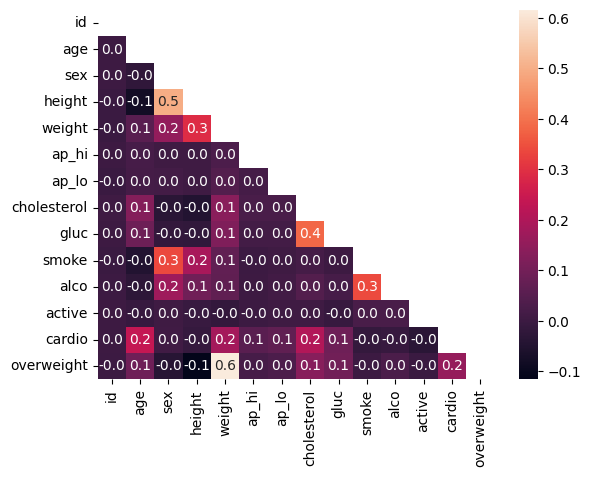

In [112]:
fig1=draw_heat_map()